starting with series model, calc l and c 
w1=2*3.1415*10e6
x1=-14.1  # @10M
w2=2*3.1415*15e6
x2=15.4  # @15M
c=(w1/w2**.5 - 1/w1) / (x1 - x2*w1/w2)
#c=(w2/w1**.5 - 1/w2) / (x2 - x1*w2/w1)
L = x2/w2 - 1/(c*w2**2)
res_w = (1/(L*c))**.5
res_f = 1 / ( 2 * 3.1415 * (L*c)**.5)
L*1e9, c*1e9, res_f*1e-6

In [168]:
import numpy as np
import scipy.optimize as opt
from numpy import exp
import timeit

st1 = timeit.default_timer()

def f(variables) :
    (x,y) = variables

    first_eq = x + y**2 -4
    second_eq = exp(x) + x*y - 3
    return [first_eq, second_eq]

solution = opt.fsolve(f, (0.1,1) )
print(solution)


st2 = timeit.default_timer()
print("RUN TIME : {0}".format(st2-st1))

[ 0.62034452  1.83838393]
RUN TIME : 0.02153864299179986


In [34]:
w1=2*3.1415*10e6
x1=-14.1  # @10M
w2=2*3.1415*15e6
x2=15.4  # @15M

def series_lc(variables) :
    (l,c) = variables

    first_eq = w1*l - 1/(w1*c)  - x1
    second_eq = w2*l - 1/(w2*c) - x2
    return [first_eq, second_eq]

solution = opt.fsolve(series_lc, (1e-9,1e-9) )
L, C = solution
print('L=%.3fnH, C=%.3fpF' % (L*1e9, C*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(L*C)**0.5)))

L=473.659nH, C=362.881pF
resonance 12.139629MHz


In [71]:
w1=2*3.1415*10e6
x1=-27  # @10M
y1 = -1 / x1

w2=2*3.1415*20e6
x2=6.6  # @20M
y2 = -1 / x2

def parallel_lc(variables) :
    (l,c) = variables

    first_eq = 1/(w1*l) - (w1*c)  - y1
    second_eq = 1/(w2*l) - (w2*c) - y2
    return [first_eq, second_eq]

solution = opt.fsolve(parallel_lc, (1e-9,1e-9) )
L, C = solution
print('L=%.3fnH, C=%.3fpF' % (L*1e9, C*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(L*C)**0.5)))
y1

L=105.829nH, C=1804.166pF
resonance 11.518058MHz


0.037037037037037035

In [44]:
# Test parallel maths with the lc from series above
L=473.659e-9
C=362.881e-12
Y10 = 1/(w1*L) - (w1*C)
Y15 = 1/(w2*L) - (w2*C)
1/Y10, 1/Y15

(92.57250961208719, -34.72397246538485)

Now let's try with complex numbers

fsolve finds zeros of functions from $R^n \to R$

Try rewriting the function as $R^4 \to R^4$

In [67]:
w1 = 2 * 3.1415 * 10e6
x1 = 5 -14.1j  # @10M
w2 = 2 * 3.1415 * 15e6
x2 = 5 + 15.4j  # @15M

def series_lc(variables) :
    (lr, li, cr, ci) = variables
    l = complex(lr, li)
    c = complex(cr, ci)
    first_eq = w1*l + 1/(w1*c)  - x1
    second_eq = w2*l + 1/(w2*c) - x2
    return [first_eq.real, first_eq.imag, second_eq.real, second_eq.imag]

solution = opt.fsolve(series_lc, (0, 1e-9, 0, 1e-9))
_, L, _, C = solution
print('L=%.3fnH, C=%.3fpF' % (L*1e9, C*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(L*C)**0.5)))

L=473.659nH, C=361.191pF
resonance 12.167993MHz


In [74]:
# parallel with complex nos - here the 5R makes a big difference
# should probably include the 5R in series in the equations
w1 = 2 * 3.1415 * 10e6
x1 = 5 -27j  # @10M
y1 = -1 / x1

w2 = 2 * 3.1415 * 20e6
x2 = 5 +6.6j  # @20M
y2 = -1 / x2

def parallel_lc(variables) :
    (lr, li, cr, ci) = variables
    l = complex(lr, li)
    c = complex(cr, ci)
    
    first_eq = 1/(w1*l) + (w1*c) - y1
    second_eq = 1/(w2*l) + (w2*c) - y2
    return [first_eq.real, first_eq.imag, second_eq.real, second_eq.imag]

solution = opt.fsolve(parallel_lc, (0, 1e-9, 0, 1e-9))
print(solution)
_, L, _, C = solution
print('L=%.3fnH, C=%.3fpF' % (L*1e9, C*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(L*C)**0.5)))

[  4.48720310e-08   1.26257361e-07  -7.38640475e-10   1.21142293e-09]
L=126.257nH, C=1211.423pF
resonance 12.868984MHz


In [78]:
# parallel with complex nos and a 5R in series
w1 = 2 * 3.1415 * 10e6
x1 = 5 -27j  # @10M
y1 = -1 / x1

w2 = 2 * 3.1415 * 20e6
x2 = 5 +6.6j  # @20M
y2 = -1 / x2

def parallel_lc(variables) :
    # now with a 5R in series
    (lr, li, cr, ci) = variables
    l = complex(lr, li)
    c = complex(cr, ci)
    
    first_eq = 1/(1/(w1*l) + (w1*c)) + 5 - x1
    second_eq = 1/(1/(w2*l) + (w2*c)) + 5 - x2
    return [first_eq.real, first_eq.imag, second_eq.real, second_eq.imag]

solution = opt.fsolve(parallel_lc, (0, 1e-9, 0, 1e-9))
print(solution)
_, L, _, C = solution
print('L=%.3fnH, C=%.3fpF' % (L*1e9, C*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(L*C)**0.5)))

[ -9.24464407e-09  -8.58474531e-08  -2.04705277e-09   6.44554224e-07]
L=-85.847nH, C=644554.224pF
resonance nanMHz


/usr/local/lib/python3.4/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


L=473.659nH, C=361.191pF
resonance 12.167993MHz


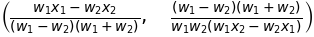

In [173]:
import sympy as sp
sp.init_printing()
I = sp.I
w1, x1, w2, x2 = sp.symbols('w1 x1 w2 x2')
sz10 = w1*sl + 1/(w1*sc)
sz15 = w2*sl + 1/(w2*sc)
sL, sC = sp.solve([sz10-x1, sz15-x2], [sl, sc])[0]
L = sL.subs({
    w1:2 * 3.1415 * 10e6,
    x1:5 -14.1j,
    w2:2 * 3.1415 * 15e6,
    x2:5 + 15.4j
})
C = sC.subs({
    w1:2 * 3.1415 * 10e6,
    x1:5 -14.1j,
    w2:2 * 3.1415 * 15e6,
    x2:5 + 15.4j
})
print('L=%.3fnH, C=%.3fpF' % (sp.im(L)*1e9, sp.im(C)*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(sp.im(L) * sp.im(C))**0.5)))
sL, sC

In [170]:
# x20 = 5 +6.6j
# x10 = 5 -27j
# w20 =  2 * np.pi * 20e6
# w10 = 2 * np.pi * 10e6
import numpy as np
w10, x10, w20, x20 = sp.symbols('w10 x10 w20 x20')
sy10 = 1 /(w10*sl) + (w10*sc)
sz10 = 1 / sy10
sy20 = 1 / (w20*sl) + (w20*sc)
sz20 = 1 / sy20
sL, sC = sp.solve([sz10-x10, sz20-x20], [sl, sc])[0]
sL, sC
#sp.solve([sz10-x10, sz20-x20], [sl, sc])
L = sL.subs({
    w10:2 * np.pi * 10e6,
    x10:5 -27j,
    w20:2 * np.pi * 20e6,
    x20:5 +6.6j
})
C = sC.subs({
    w10:2 * np.pi * 10e6,
    x10:5 -27j,
    w20:2 * np.pi * 20e6,
    x20:5 +6.6j
})
print('L=%.3fnH, C=%.3fpF' % (sp.im(L)*1e9, sp.im(C)*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(sp.im(L) * sp.im(C))**0.5)))

L=-126.254nH, C=-1211.387pF
resonance 12.869363MHz
